<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_01_pandas_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



# Solución

**1. Leer los datos desde una página web.**

In [130]:
!pip install -q ucimlrepo

In [131]:
# Librerías
import re
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
warnings.filterwarnings('ignore')

In [132]:
# Lectura de datos (código obtenido de la página web dada)

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**2. Renombrar las columnas en formato PascalCase.**

In [133]:
# 1. Función para convertir una cadena a PascalCase
def to_pascal_case(column_name):
    # Reemplaza guiones bajos y espacios con un espacio para luego dividir
    name = column_name.replace('_', ' ').replace('-', ' ')

    # Dividir por espacios, capitalizar cada palabra y unirlas sin espacios
    return "".join(word.capitalize() for word in name.split())

df = X.copy()

# 2. Aplicar la función a todos los nombres de las columnas
df.columns = [to_pascal_case(col) for col in df.columns]

# 3. Verificar el resultado
print("Nuevos nombres de columnas:")
print(df.columns.tolist())

df.head()

Nuevos nombres de columnas:
['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1', 'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1', 'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2', 'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2', 'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3', 'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3', 'Symmetry3', 'FractalDimension3']


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**3. Utilizar los métodos ``head()``, ``tail()``, ``describe()`` e ``info()`` para obtener información sobre el DataFrame.**

In [134]:
print("\n df.head(): Primeras filas del DataFrame \n")
df.head()


 df.head(): Primeras filas del DataFrame 



,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [135]:
print("\n df.tail() : Últimas filas del DataFrame \n")        # Ultimas filas
df.tail()


 df.tail() : Últimas filas del DataFrame 



,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [136]:
print("\n df.describe(): Datos Estadísticos \n")
df.describe()


 df.describe(): Datos Estadísticos 



,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [137]:
print("\n df.info(): Información general del DataFrame")
X.info()


 df.info(): Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactnes

**4. Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?**

In [138]:
print("--- Conteo de valores nulos por columna ---")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0]) # Muestra solo las columnas con nulos

print("\n--- Conteo total de valores nulos en el DataFrame ---")
total_nulls = df.isnull().sum().sum()
print(total_nulls)

--- Conteo de valores nulos por columna ---
Series([], dtype: int64)

--- Conteo total de valores nulos en el DataFrame ---
0


**5. Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método ``unique()`` para mostrar estos valores.**

In [139]:
print("--- Valores únicos en la columna target (y) ---")
print(y.iloc[:, 0].unique())

--- Valores únicos en la columna target (y) ---
['M' 'B']


**6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería ``seaborn`` y el método ``countplot()``**

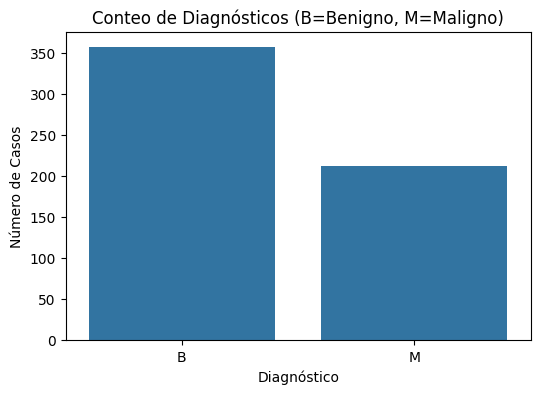

In [140]:
target_series = y.iloc[:, 0]

plt.figure(figsize=(6, 4))
sns.countplot(x=target_series, order=['B', 'M'])
plt.title('Conteo de Diagnósticos (B=Benigno, M=Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de Casos')
plt.show()

**7. Agregar una nueva columna llamada ``DiagnosisNumeric`` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).**

In [141]:
# Se hace una copia del DataFrame original
y_mod = y.copy()

# Reemplazo
y_mod['DiagnosisNumeric'] = y_mod['Diagnosis'].replace({'B': 0, 'M': 1}).astype(int)

y_mod.head()

,Diagnosis,DiagnosisNumeric
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1


**8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`**

In [142]:
# 1. Calculo de la media
X_mean = X.mean()

# 2. Calculo Desviación Estándar
X_std = X.std()

# 3. Estandarización
X_norm = (X - X_mean) / X_std

X_norm.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


**9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

In [143]:
# 1. Función para extraer el nombre base de la característica
def get_base_name(column_name):
    """
    Extrae la parte inicial de la columna antes del número (ej: 'Radius' de 'Radius1').
    """
    # Expresión regular que busca una o más letras mayúsculas/minúsculas al
    # inicio de la cadena, y se detiene antes de encontrar un dígito (el 1, 2 o 3).
    match = re.match(r'([A-Za-z]+)', column_name)
    if match:
        return match.group(1)
    return column_name # Retorna el nombre original si no encuentra un patrón

In [144]:
# 2. Diccionario para mapear las columnas a sus nombres base (ej: 'Radius1' -> 'Radius')
# (agrupa todas las columnas que representan la misma característica.)
column_mapping = {col: get_base_name(col) for col in X_norm.columns}

# 3. Nuevo DataFrame
df_agrupado = pd.DataFrame()

print("--- Columnas Creadas y Columnas Agrupadas ---")

# Iteración sobre los nombres base únicos
for base_name in sorted(set(column_mapping.values())):
    # columnas originales que corresponden a este nombre base
    cols_to_average = [col for col in X_norm.columns if get_base_name(col) == base_name]

    # Solo se agrupa si hay más de una columna (ej: Radius1, Radius2, Radius3)
    if len(cols_to_average) > 1:
        # 4. Promedio horizontal (filas: axis=1)
        df_agrupado[f'{base_name}Mean'] = X_norm[cols_to_average].mean(axis=1)
        print(f"[{base_name}Mean]: Promedio de {', '.join(cols_to_average)}")

--- Columnas Creadas y Columnas Agrupadas ---
[areaMean]: Promedio de area1, area2, area3
[compactnessMean]: Promedio de compactness1, compactness2, compactness3
[concaveMean]: Promedio de concave_points1, concave_points2, concave_points3
[concavityMean]: Promedio de concavity1, concavity2, concavity3
[fractalMean]: Promedio de fractal_dimension1, fractal_dimension2, fractal_dimension3
[perimeterMean]: Promedio de perimeter1, perimeter2, perimeter3
[radiusMean]: Promedio de radius1, radius2, radius3
[smoothnessMean]: Promedio de smoothness1, smoothness2, smoothness3
[symmetryMean]: Promedio de symmetry1, symmetry2, symmetry3
[textureMean]: Promedio de texture1, texture2, texture3


In [145]:
# 5. DataFrame resultante
print("\n--- Características agrupadas y promediadas  ---")
df_agrupado.head()


--- Características agrupadas y promediadas  ---


,areaMean,compactnessMean,concaveMean,concavityMean,fractalMean,perimeterMean,radiusMean,smoothnessMean,symmetryMean,textureMean
0,1.822793,2.403566,1.828182,1.827201,1.698454,2.133644,1.822892,0.886604,2.037172,-1.331460
1,1.512536,-0.536342,0.631241,-0.203612,-0.228767,1.160448,1.377122,-0.602112,-0.349009,-0.532558
2,1.397605,0.982746,1.804099,0.809797,0.032286,1.253866,1.438879,0.390527,0.775643,-0.115855
3,-0.533818,3.343920,1.579444,1.573617,3.960995,-0.185181,-0.241121,2.453684,4.544703,0.092354
4,1.411195,0.059090,1.099685,0.936729,-0.153272,1.461481,1.438539,0.660750,-0.412639,-1.135278


**10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.**

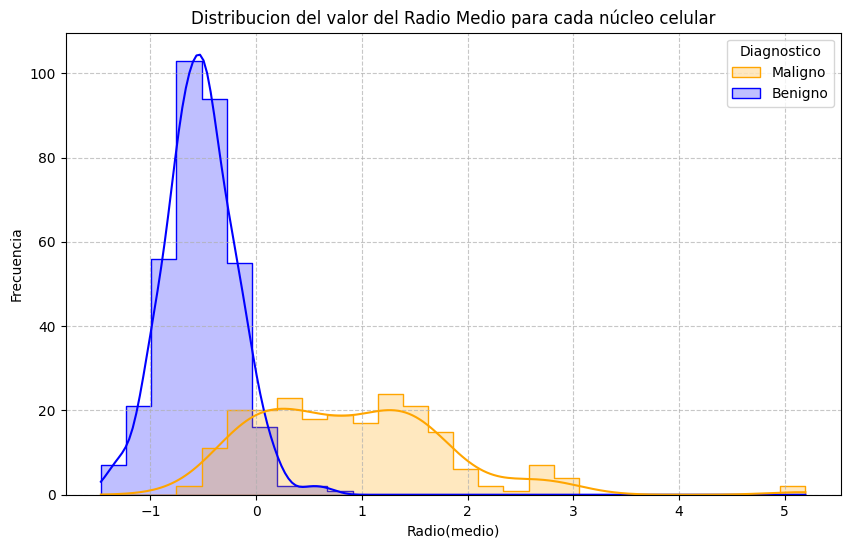

In [146]:
# DataFrame temporal para el gráfico
df_plot = pd.DataFrame({
    'RadiusMean': df_agrupado['radiusMean']})

# 2. Etiquetas de texto
df_plot['Diagnostico'] =  y_mod['Diagnosis'].map({'B': 'Benigno', 'M': 'Maligno'})

# Configuración de los colores
colores = {'Benigno': 'blue', 'Maligno': 'orange'}

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(
    data = df_plot,
    x = 'RadiusMean',
    hue = 'Diagnostico',
    palette = colores,
    kde=True,
    element='step', # Histogramas escalonados y superpuestos
    stat='count',
    common_norm=False) # Normaliza cada histograma

plt.title('Distribucion del valor del Radio Medio para cada núcleo celular')
plt.xlabel('Radio(medio)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**11. Generar gráficos de violín para múltiples características.
   Para las columnas:** `RadiusMean`, `TextureMean.`, `PerimeterMean`, `AreaMean`, `SmoothnessMean`, `CompactnessMean`, `ConcavityMean`, `ConcavePointsMean`, `Symmetry3`, `FractalDimension3`

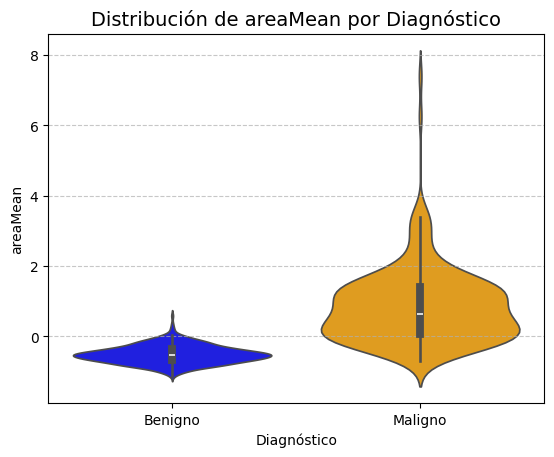

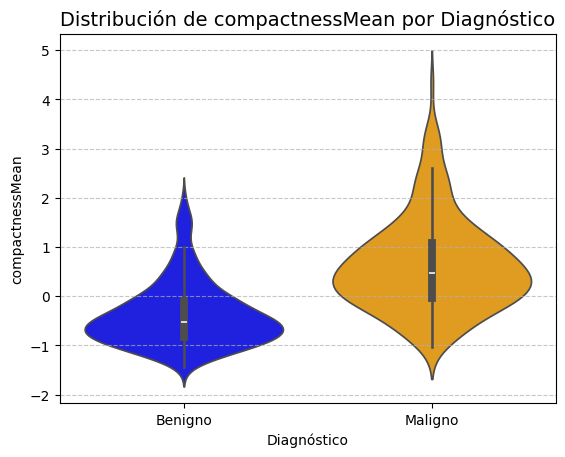

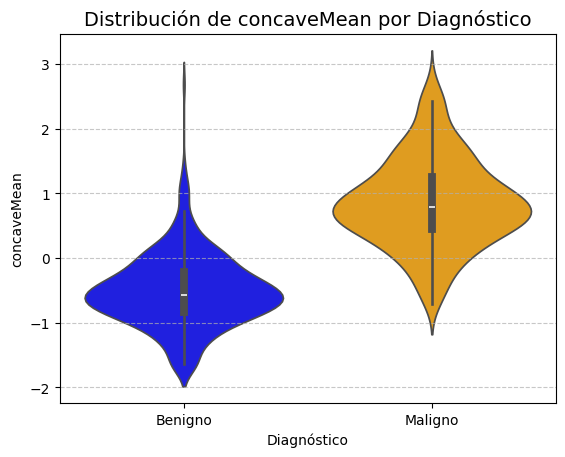

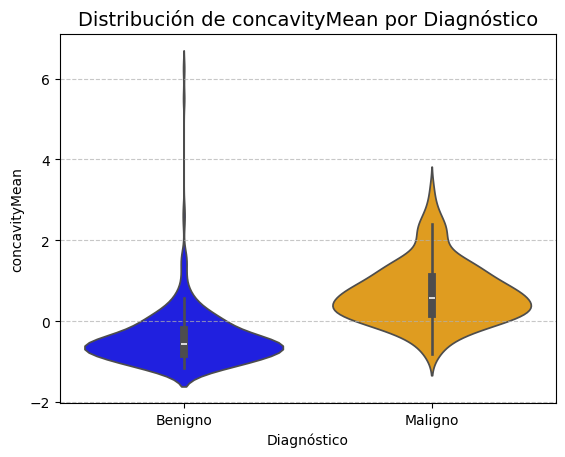

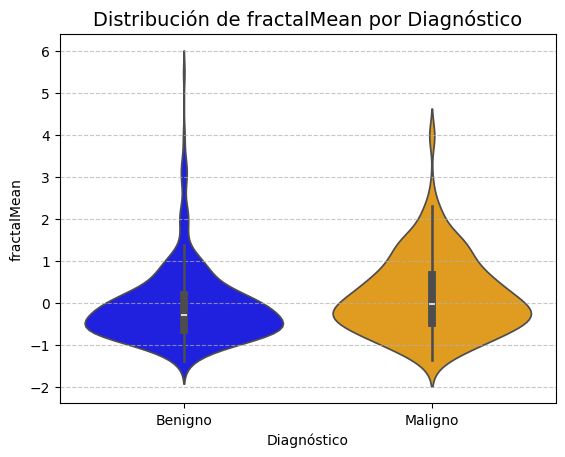

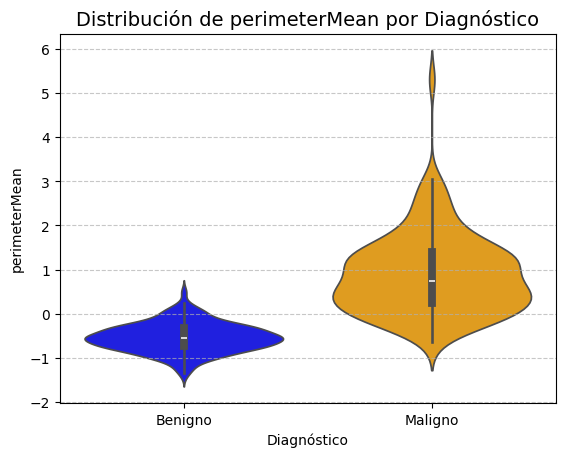

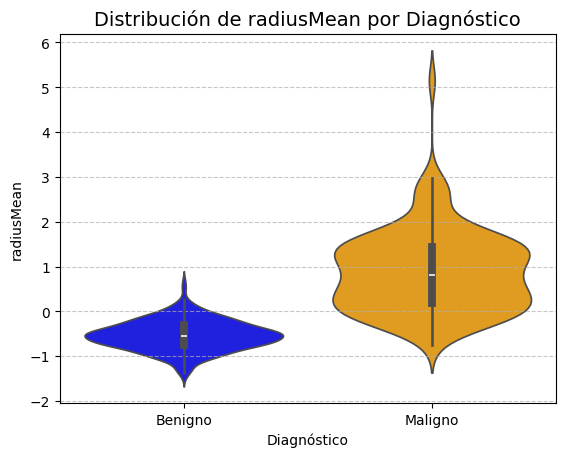

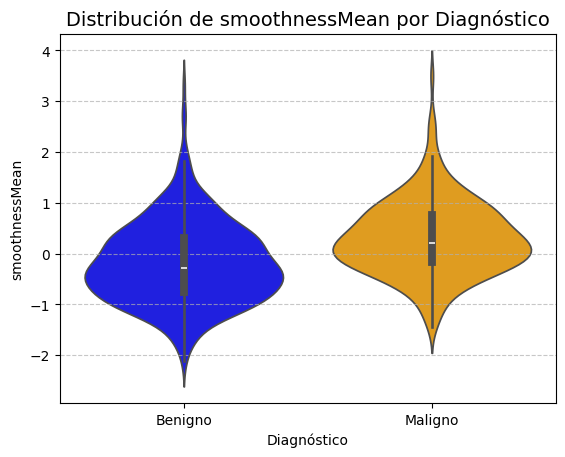

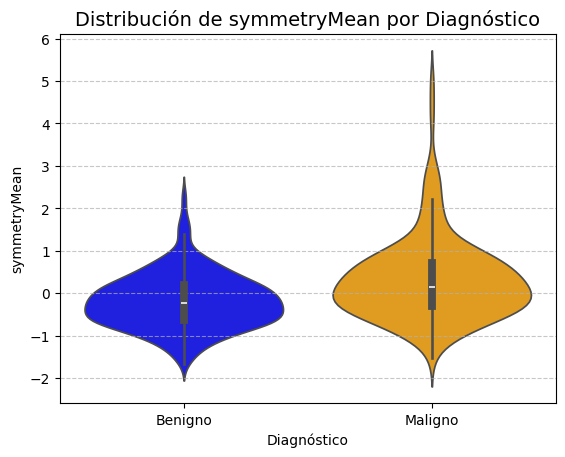

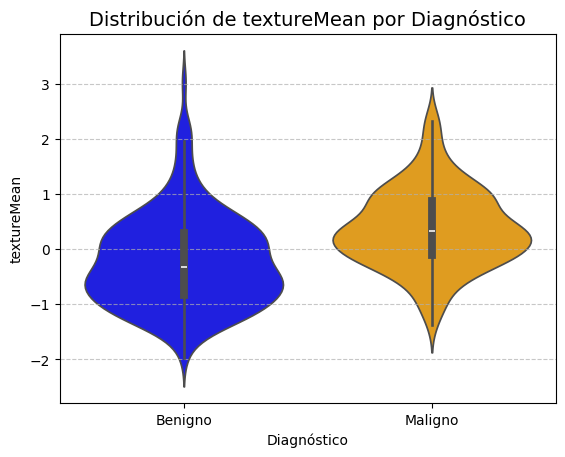

In [147]:
carac = df_agrupado.columns.tolist()

for i in range(len(carac)):
    plt.figure()

    sns.violinplot(
        x= df_plot['Diagnostico'],  # Categorías (Benigno/Maligno)
        y= df_agrupado.iloc[:,i],
        palette=colores,
        order=['Benigno', 'Maligno']
    )

    plt.title(f'Distribución de {carac[i]} por Diagnóstico', fontsize=14)
    plt.xlabel('Diagnóstico')
    plt.ylabel(carac[i])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

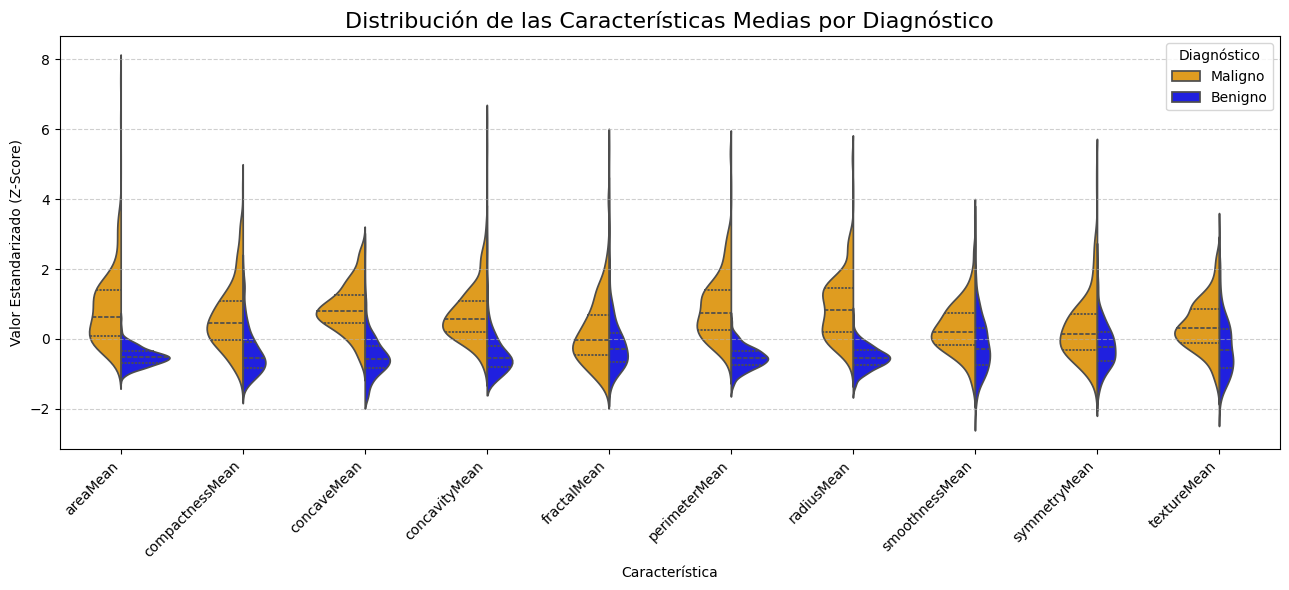

In [148]:
# Unimos DataFrames
df_mult = pd.concat([df_agrupado,  df_plot['Diagnostico']], axis=1).dropna()

# Se transforma el DataFrame al formato 'long'
data_long = pd.melt(df_mult,
    id_vars="Diagnostico",            # Columna de identificación
    var_name="Feature",               # columna de etiquetas (eje x)
    value_name="Value")               #    "   "   (eje y)


# Gráfico de violín múltiple
plt.figure(figsize=(13, 6))
sns.violinplot(x="Feature", y="Value", hue="Diagnostico",
    data=data_long,
    split=True,     # Fusiona las mitades de los violines de Benigno y Maligno
    inner="quart",  # Cuartiles internos
    palette={'Benigno': 'blue', 'Maligno': 'orange'})

plt.title('Distribución de las Características Medias por Diagnóstico', fontsize=16)
plt.xlabel('Característica')
plt.ylabel('Valor Estandarizado (Z-Score)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diagnóstico')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.**

<Figure size 640x480 with 0 Axes>

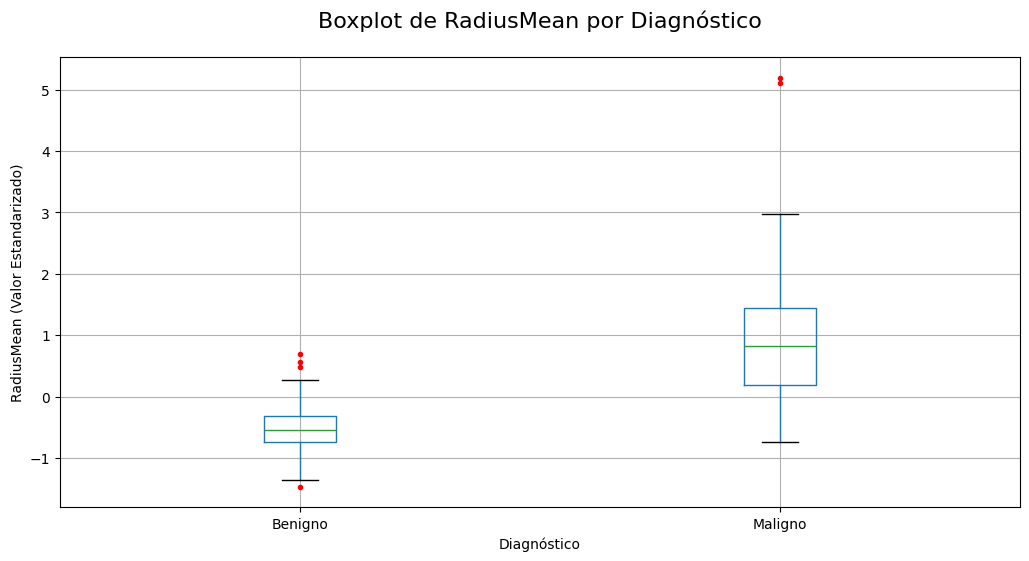

In [149]:
plt.figure()
df_mult.boxplot(column="radiusMean", by='Diagnostico', sym='r.', figsize=(12,6))
plt.suptitle('Boxplot de RadiusMean por Diagnóstico', fontsize=16)
plt.title('')
plt.xlabel('Diagnóstico')
plt.ylabel('RadiusMean (Valor Estandarizado)')
plt.show()

In [150]:
# Se crea un nuevo DataFrame
df_sin_outliers = df_mult.copy()

# Calculo de Q1, Q3 e IQR para la columna radiusMean
Q1 = df_sin_outliers['radiusMean'].quantile(0.25)
Q3 = df_sin_outliers['radiusMean'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites de detección
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Filtrar DataFrame
df_sin_outliers = df_sin_outliers[
    ~((df_sin_outliers['radiusMean'] < lim_inf) |
      (df_sin_outliers['radiusMean'] > lim_sup))]

# Resultados
print("--- Resumen de la Eliminación de Outliers ---")
print(f"Filas originales: {len(df_mult)}")
print(f"Límite Inferior (IQR): {lim_inf:.4f}")
print(f"Límite Superior (IQR): {lim_sup:.4f}")
print(f"Filas restantes: {len(df_sin_outliers)}")
print(f"Outliers eliminados: {len(df_mult) - len(df_sin_outliers)}")

--- Resumen de la Eliminación de Outliers ---
Filas originales: 569
Límite Inferior (IQR): -2.0968
Límite Superior (IQR): 1.8591
Filas restantes: 547
Outliers eliminados: 22


**13. Encontrar la matrix de correlación, emplear el metodo ``corr()``, dentro de seaborn buscar el metodo ``heatmap()`` para realizar un grafico de la matrix de correlación.**

In [151]:
matriz_correlacion = X_norm.corr()

print("\n Matriz de Correlación \n")
matriz_correlacion.head()


 Matriz de Correlación 



,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


**14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?**

---
- **Gráfico de Barras Agrupadas para Valores Promedio**: El objetivo es comparar la media de todas las características ('RadiusMean', etc.) lado a lado para Benigno y Maligno. Las barras para el diagnóstico 'Maligno' serán consistentemente más altas que las barras para 'Benigno' en casi todas las características de tamaño (Radio, Área, etc.), confirmando la tendencia de que los tumores malignos tienen valores medios significativamente mayores.

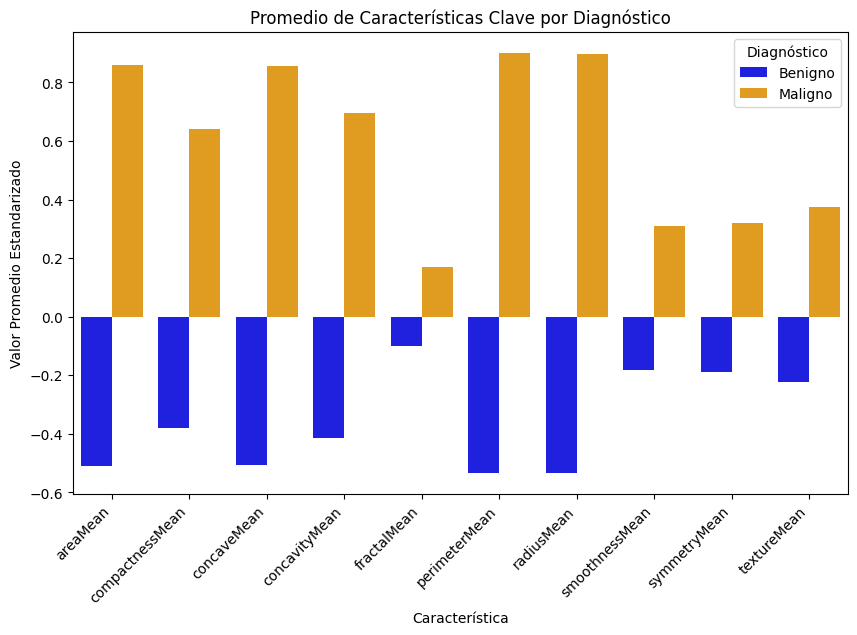

In [152]:
# Calculamos la media
df_medias = df_mult.groupby('Diagnostico')[carac].mean().reset_index()

# Se transforma a formato long (tidy data) para el gráfico de barras:
df_medias_long = pd.melt(df_medias, id_vars='Diagnostico', var_name='Feature',
                         value_name='Mean_Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Mean_Value', hue='Diagnostico', data=df_medias_long,
            palette={'Benigno': 'blue', 'Maligno': 'orange'})
plt.title('Promedio de Características Clave por Diagnóstico')
plt.xlabel('Característica')
plt.ylabel('Valor Promedio Estandarizado')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diagnóstico')
plt.show()

- **Gráfico de Dispersión (Scatter Plot)**: Este gráfico es fundamental para examinar la relación entre dos variables numéricas y ver cómo el diagnóstico influye en esa relación. De este modo, el objetivo es ver si las características se separan linealmente.

Si las etiquetas 'Benigno' y 'Maligno' se agrupan en regiones separadas del gráfico, significa que estas dos características son buenas para la clasificación.

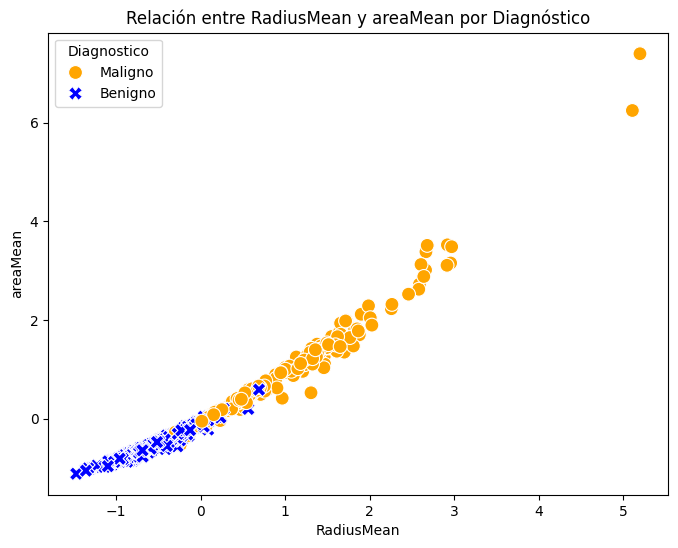

In [153]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mult, x='radiusMean', y='areaMean',
                hue='Diagnostico', palette={'Benigno': 'blue', 'Maligno': 'orange'},
                style='Diagnostico', s=100)
plt.title('Relación entre RadiusMean y areaMean por Diagnóstico')
plt.xlabel('RadiusMean')
plt.ylabel('areaMean')
plt.show()

- **Gráfico de Matriz de Dispersión (Pair Plot)**: este gráfico es una herramienta poderosa que permite generar un gráfico de dispersión para cada par de variables en los Datos y un histograma (o KDE) de cada variable en la diagonal. Es ideal para una visión rápida de todas tus características.

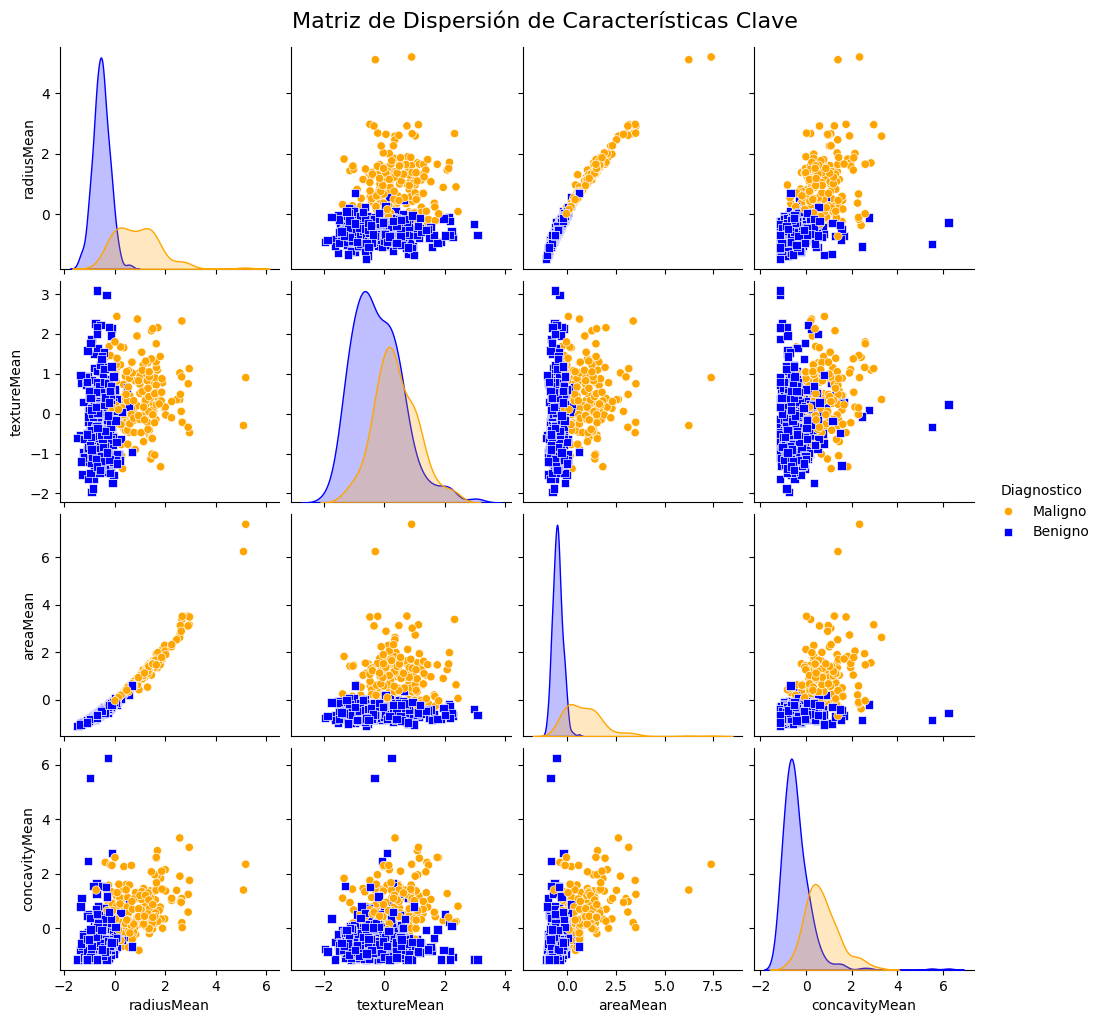

In [154]:
# Seleccionamos algunas de las características
carac_muestra = ['radiusMean', 'textureMean', 'areaMean', 'concavityMean']

# Crea el DataFrame para el pairplot
df_pairplot = df_mult[carac_muestra + ['Diagnostico']]

sns.pairplot(df_pairplot, hue='Diagnostico',
    palette={'Benigno': 'blue', 'Maligno': 'orange'},
    markers=["o", "s"])
plt.suptitle('Matriz de Dispersión de Características Clave', y=1.02, fontsize=16)
plt.show()